In [17]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [18]:
df = pd.read_csv('real.csv')
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013,8.1,104.81010,5,24.96674,121.54067,52.5


In [19]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2012.695652,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.460687,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.000000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.000000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.000000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [20]:
a = df.corr()
a

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.049171,0.016519,-0.005586,0.008118,0.013177,0.081545
X2 house age,0.049171,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.016519,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.005586,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.008118,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,0.013177,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.081545,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


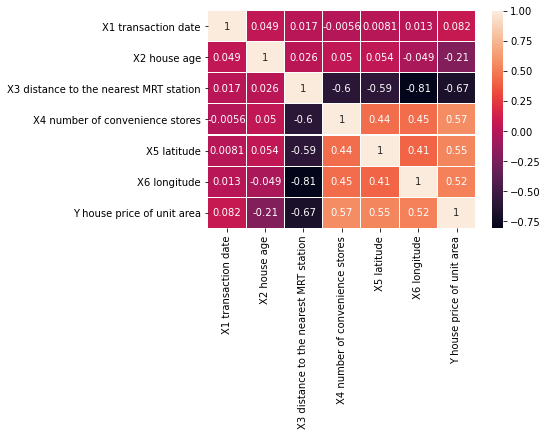

In [21]:
sns.heatmap(a,annot=True,linewidths=0.1)

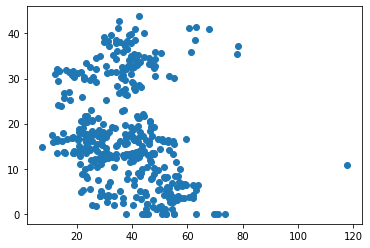

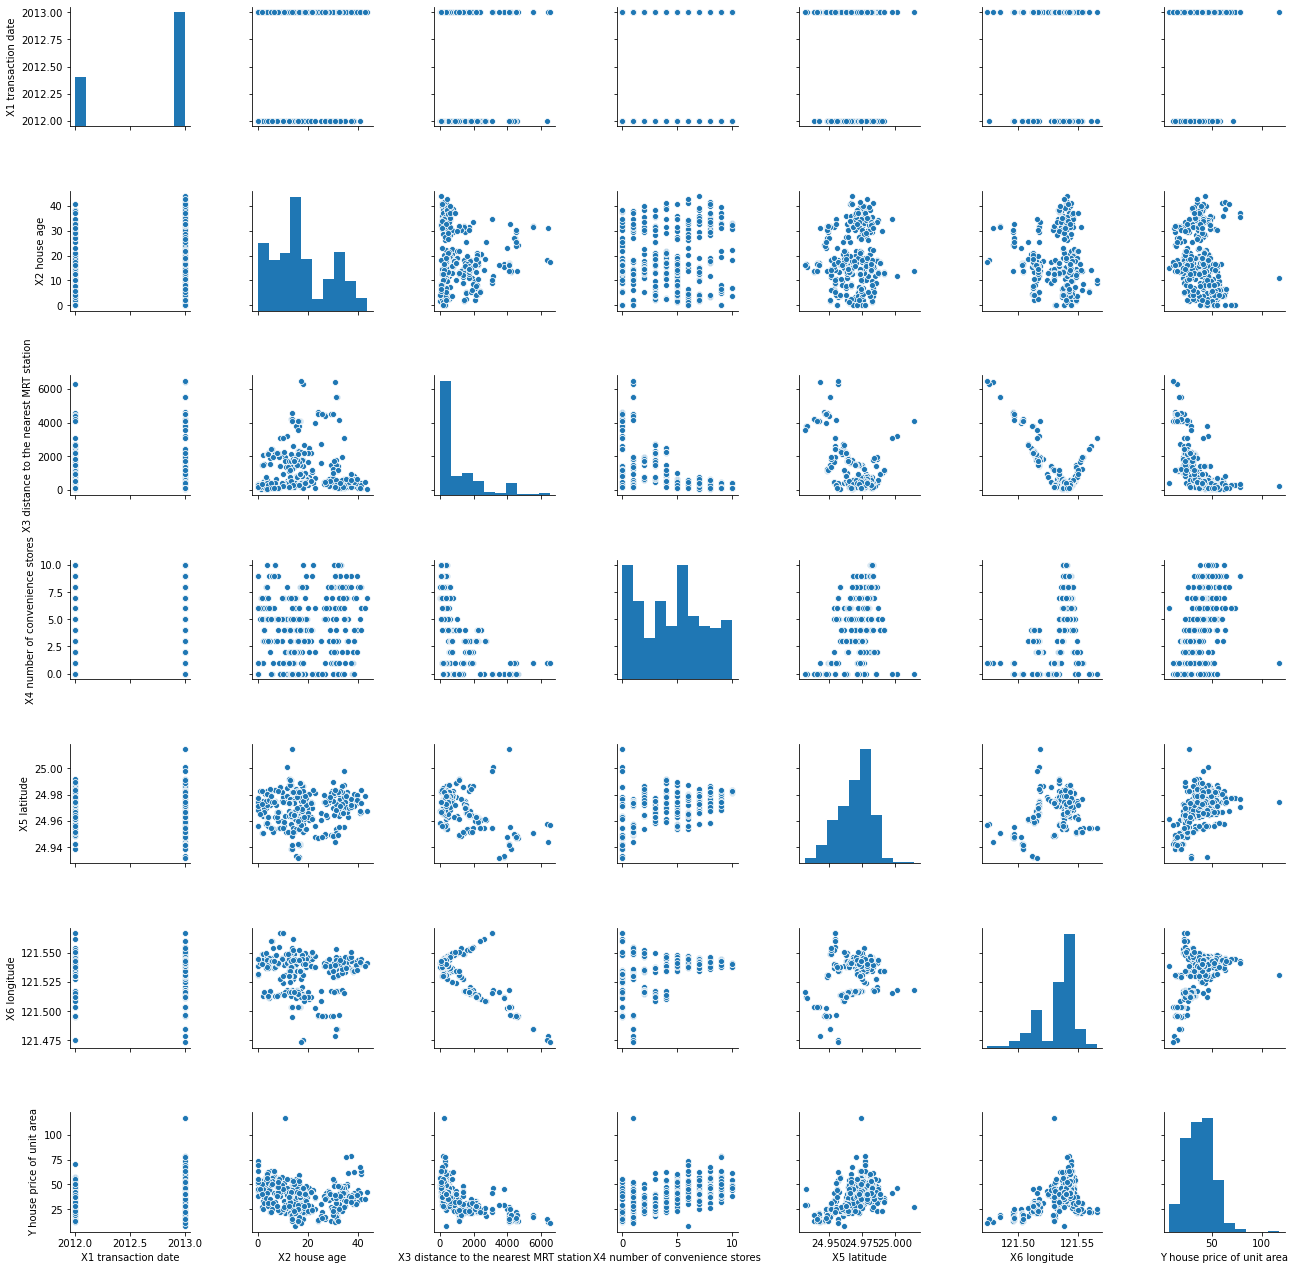

In [22]:
plt.scatter(df['Y house price of unit area'],df['X2 house age'])
sns.pairplot(df)

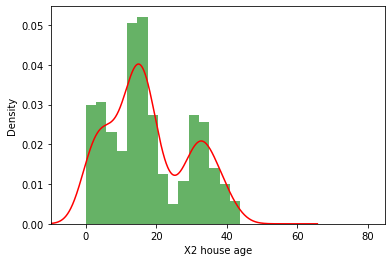

In [23]:
ax = df["X2 house age"].hist(bins=15, density=True, stacked=True, color='green', alpha=0.6)
df["X2 house age"].plot(kind='density', color='red')
ax.set(xlabel='X2 house age')
plt.xlim(-10,85)
plt.show()

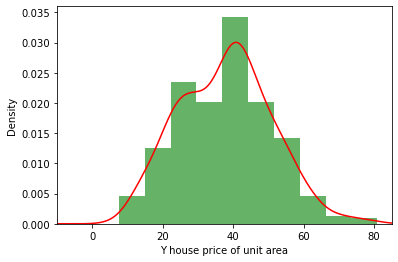

In [24]:
bx = df["Y house price of unit area"].hist(bins=15, density=True, stacked=True, color='green', alpha=0.6)
df["Y house price of unit area"].plot(kind='density', color='red')
bx.set(xlabel='Y house price of unit area')
plt.xlim(-10,85)
plt.show()


In [25]:
### OR df.loc[:, df.columns != 'b']  ///    X = df.iloc[:, df.columns != 'Rings'].values

# split the data into independent and dependent variable    ##classsification
from sklearn.model_selection import train_test_split
X = df.iloc[:, 0:6].values  ##  same as X = df.iloc[:, 0:3002].values
y = df.iloc[:, -1].values


In [26]:
## split the data into trainig and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 32)

In [27]:
## LINEAR REGESSION
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [28]:
pred_lin = lin_reg.predict(X_test)

In [29]:
## dataframe for predictions
pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_lin})

,Actual,Predicted
0,55.0,48.789904
1,70.1,50.725458
2,31.3,31.560282
3,13.8,22.637617
4,41.4,46.110550
...,...,...
120,42.0,46.031379
121,24.8,25.293948
122,50.0,50.447706
123,40.2,42.519472


In [ ]:
## MAE mean ABS error
## MSE square error (average of the square of differences, lower-better)
## RMSE
## R2 (measure of variations/changes of the target value, 0 o 1, higher is better)

print('MAE:', metrics.mean_absolute_error(y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lin)))
print('R2:', metrics.r2_score(y_test, pred_lin))

MAE: 5.840816990160629
MSE: 61.60503837059364
RMSE: 7.848887715504257
R2: 0.6258054100261854


In [ ]:
## LASSO - RIDGE REGRESSION
model_lasso = Lasso(alpha=0.99)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.99)

In [ ]:
pred_lasso = model_lasso.predict(X_test)
pd.DataFrame({'Actual': y_test,'Predicted': pred_lasso})

,Actual,Predicted
0,55.0,46.051824
1,70.1,48.593091
2,31.3,33.481843
3,13.8,29.543582
4,41.4,46.754174
...,...,...
120,42.0,44.904029
121,24.8,31.422114
122,50.0,51.840097
123,40.2,42.761159


In [ ]:
## MAE mean ABS error
## MSE square error (average of the square of differences, lower-better)
## RMSE
## R2 (measure of variations/changes of the target value, 0 o 1, higher is better)

print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print('R2:', metrics.r2_score(y_test, pred_lasso))

MAE: 6.350301853755354
MSE: 69.96466301209912
RMSE: 8.364488209812906
R2: 0.5750282918261209
